## Esercizio 3

### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>

<span style="color:blue">
Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes analytic solution for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ C\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$
                                                           
                                                           
                                                           
By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:
                                                           
1. By sampling **directly** the final asset price $S(T)$ for a $GBM(r,\sigma^2)$
2. By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$
</span>                                                          

<span style="color:blue"> For comparison, Black-Scholes analytic solution: </span>

In [1]:
import scipy
from scipy.special import erf
from scipy import log, exp, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


/home/andrea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
/home/andrea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
/home/andrea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
/home/andrea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  
/home/andrea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/home/andrea/anaconda3/lib/python3.7/site-packag

Nell'esercizio viene calcolato il costo delle opzioni put e call per uno specifico asset tramite geometric brownian motions (GBM). Il risultato è poi paragonato con la soluzione esatta ottenuta tramite equazione di Black-Scholes. I parametri dell'asset e dell'evoluzione del mercato sono:

- asset price: $S(t=0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$



Di seguito è riportata la stima dell'opzione call valutata a t=0: in figura sono messi a paragone i risultati ottenuti con entrambi i metodi direct GBM e cumulative GBM per la stima dell'asset price S(t)

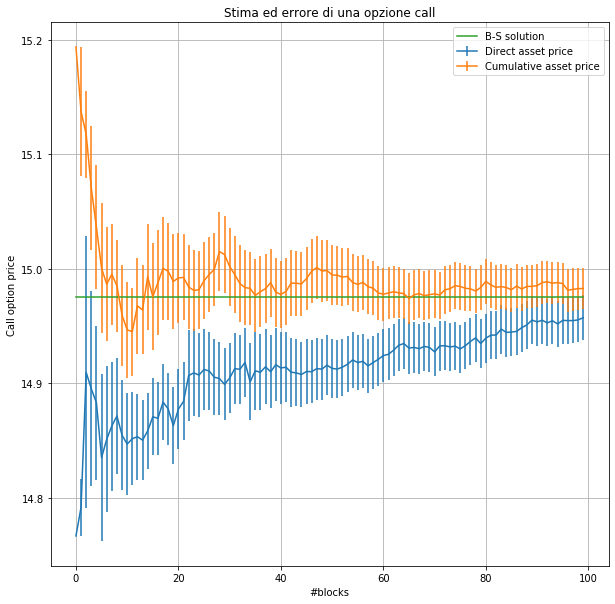

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches


file=open("3_1/es3_1_call.txt")
sum=0
for line in file:
    sum+=1
file.close()

meanD, errorD, meanC, errorC = np.loadtxt("3_1/es3_1_call.txt", usecols=(0,1,2,3), unpack='true')

plt.figure(figsize=(10,10))

x=np.arange(sum)
targetCall = np.ones(sum)*call
plt.errorbar(x,meanD,yerr=errorD, label='Direct asset price')
plt.errorbar(x,meanC,yerr=errorC, label='Cumulative asset price')
plt.plot(targetCall, label='B-S solution')
plt.xlabel('#blocks')
plt.ylabel('Call option price')
plt.title('Stima ed errore di una opzione call')
plt.grid(True)
plt.legend()
plt.show()

Di seguito è invece riportata la stima dell'opzione put valutata a t=0: in figura sono messi a paragone i risultati ottenuti con entrambi i metodi direct GBM e cumulative GMB sempre per la stima di S(t)

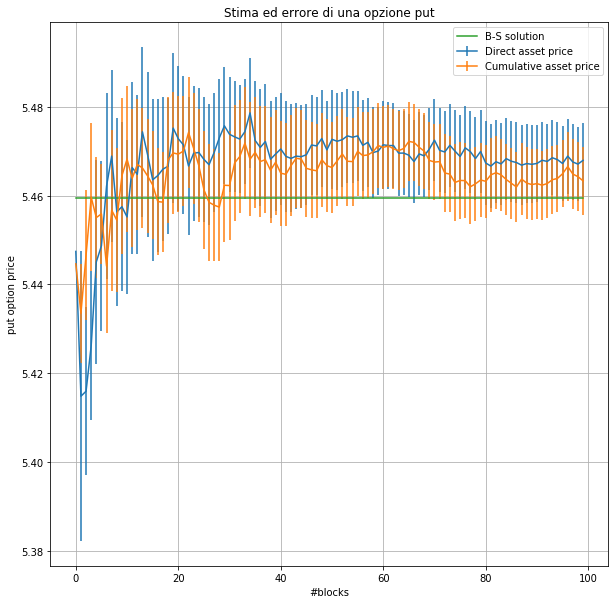

In [3]:
# grafico della stima dell'opzione put valutata a t=0.
# in figura sono messi a paragone i risultati stimati con entrambi i metodi direct e cumulative

file=open("3_1/es3_1_call.txt")
sum=0
for line in file:
    sum+=1
file.close()

meanD, errorD, meanC, errorC = np.loadtxt("3_1/es3_1_put.txt", usecols=(0,1,2,3), unpack='true')

plt.figure(figsize=(10,10))

x=np.arange(sum)
targetPut = np.ones(sum)*put
plt.errorbar(x,meanD,yerr=errorD, label='Direct asset price')
plt.errorbar(x,meanC,yerr=errorC, label='Cumulative asset price')
plt.plot(targetPut, label='B-S solution')
plt.xlabel('#blocks')
plt.ylabel('put option price')
plt.title('Stima ed errore di una opzione put')
plt.grid(True)
plt.legend()
plt.show()